In [1]:
#khai bao thu vien
import pandas as pd
import pickle as pk
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


In [2]:
#doc du lieu
df = pd.read_csv("data/heart_new.csv")
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   
0     52    1   0       125   212    0        1      168      0      1.0  \
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   68    0   2       120   211    0        0      115      0      1.5   
298   44    0   2       108   141    0        1      175      0      0.6   
299   52    1   0       128   255    0        1      161      1      0.0   
300   59    1   3       160   273    0        0      125      0      0.0   
301   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3     

In [3]:
#phan loai du lieu 
y = df['target'].values.reshape(-1,1)
X = df.drop(columns=['target'])
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(302, 13)
(302, 1)
(241, 13)
(61, 13)


In [4]:
#kiem tra tap du lieu
print(df['target'].value_counts())

target
1    164
0    138
Name: count, dtype: int64


In [5]:
#tao cay
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(i, accuracy_score(y_test,y_pred))

1 0.6065573770491803
2 0.7213114754098361
3 0.819672131147541
4 0.6885245901639344
5 0.7540983606557377
6 0.7704918032786885
7 0.7704918032786885
8 0.7540983606557377
9 0.7704918032786885


[[21  8]
 [ 3 29]]


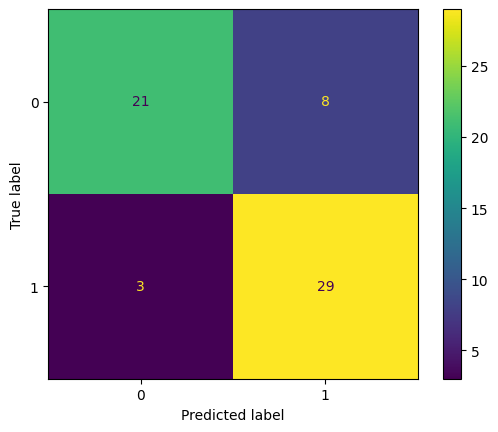

In [9]:
#du doan tren tap test
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

0.8360655737704918
[[25  4]
 [ 6 26]]


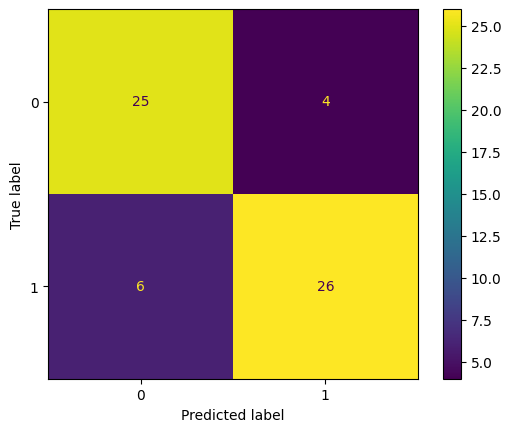

In [7]:
clf1 = RandomForestClassifier()
clf1.fit(X_train,y_train.ravel())
y_pred = clf1.predict(X_test)
print(accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [8]:
with open("Model/rdfs.pickle", "wb") as f:
    pk.dump(clf1,f)
